In [1]:
from sklearn.datasets import fetch_covtype
covtype = fetch_covtype()
print(covtype.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional a

In [2]:
import pandas as pd
df = pd.DataFrame(covtype.data, 
                  columns=["x{:02d}".format(i + 1) for i in range(covtype.data.shape[1])],
                  dtype=int)
sy = pd.Series(covtype.target, dtype="category")
df['covtype'] = sy
df.tail()

,x01,x02,x03,x04,x05,x06,x07,x08,x09,x10,...,x46,x47,x48,x49,x50,x51,x52,x53,x54,covtype
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3
581011,2383,165,13,60,4,67,231,244,141,875,...,0,0,0,0,0,0,0,0,0,3


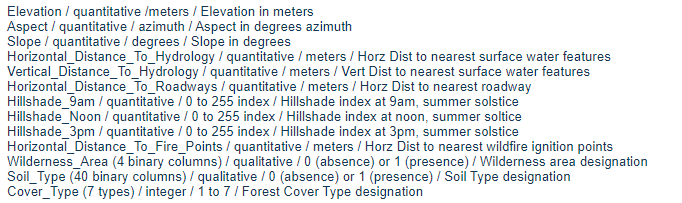

In [4]:
import numpy as np
X1 = df.iloc[ :-100 , 0:5].values
X1_test = df.iloc[-100: , 0:5].values
X2 = df.iloc[ :-100 , 5:10].values
X2_test = df.iloc[-100: , 5:10].values
print(X1)
y_train = df.iloc[:-100, 54].values
y_train = np.array(y_train)-1
y_test=df.iloc[-100:, 54].values
y_test=np.array(y_test)-1

[[2596   51    3  258    0]
 [2590   56    2  212   -6]
 [2804  139    9  268   65]
 ...
 [2459  210   21  360   51]
 [2466  221   28  360   58]
 [2481  223   35  360   84]]


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
sc = StandardScaler()
sc1 = StandardScaler()
sc.fit(X1)
sc1.fit(X2)
X1_train_std = sc.transform(X1)
X1_test_std = sc.transform(X1_test)
X2_train_std = sc1.transform(X2)
X2_test_std = sc1.transform(X2_test)

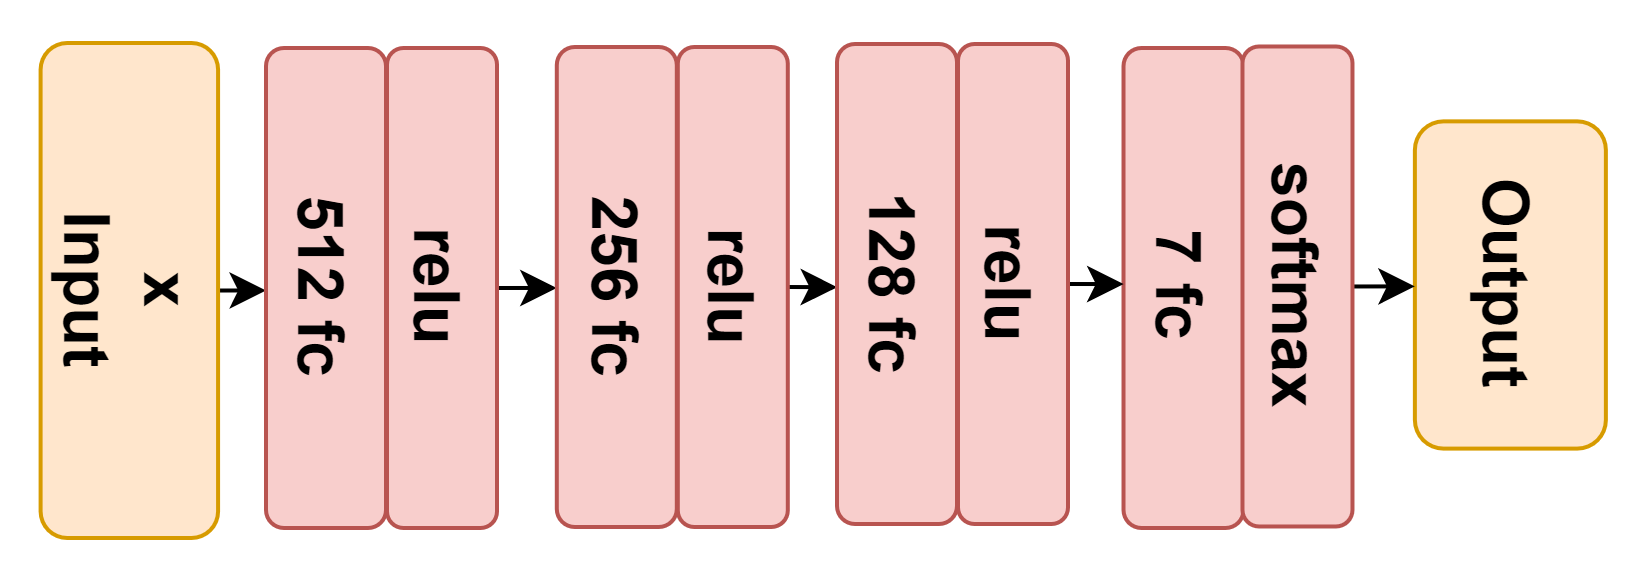

In [6]:
import tensorflow as tf

input = tf.keras.layers.Input(shape=[5])
x1 = tf.keras.layers.Dense(512, activation='relu')(input)
x2 = tf.keras.layers.Dense(256, activation='relu')(x1)
x3 = tf.keras.layers.Dense(128, activation='relu')(x2)
predictions = tf.keras.layers.Dense(7, activation='softmax')(x3)

model = tf.keras.Model(inputs=input, outputs=predictions)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  #categorical_crossentropy
              metrics=['accuracy'])
model.fit(X1_train_std, y_train, epochs=100,batch_size=1000)

Epoch 1/100
581/581 [==============================] - 18s 30ms/step - loss: 0.7190 - accuracy: 0.6976
Epoch 2/100
581/581 [==============================] - 17s 30ms/step - loss: 0.6579 - accuracy: 0.7129
Epoch 3/100
581/581 [==============================] - 17s 29ms/step - loss: 0.6458 - accuracy: 0.7179
Epoch 4/100
581/581 [==============================] - 17s 30ms/step - loss: 0.6367 - accuracy: 0.7217
Epoch 5/100
581/581 [==============================] - 18s 31ms/step - loss: 0.6293 - accuracy: 0.7250
Epoch 6/100
581/581 [==============================] - 16s 28ms/step - loss: 0.6223 - accuracy: 0.7269
Epoch 7/100
581/581 [==============================] - 15s 27ms/step - loss: 0.6166 - accuracy: 0.7299
Epoch 8/100
581/581 [==============================] - 15s 26ms/step - loss: 0.6110 - accuracy: 0.7318
Epoch 9/100
581/581 [==============================] - 16s 27ms/step - loss: 0.6060 - accuracy: 0.7337
Epoch 10/100
581/581 [==============================] - 17s 28ms/step - l

In [7]:
input = tf.keras.layers.Input(shape=[5])
x1 = tf.keras.layers.Dense(512, activation='relu')(input)
x2 = tf.keras.layers.Dense(256, activation='relu')(x1)
x3 = tf.keras.layers.Dense(128, activation='relu')(x2)
predictions = tf.keras.layers.Dense(7, activation='softmax')(x3)

model1 = tf.keras.Model(inputs=input, outputs=predictions)

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  #categorical_crossentropy
              metrics=['accuracy'])
model1.fit(X2_train_std, y_train, epochs=100,batch_size=1000)

Epoch 1/100
581/581 [==============================] - 15s 24ms/step - loss: 1.0227 - accuracy: 0.5478
Epoch 2/100
581/581 [==============================] - 14s 24ms/step - loss: 0.9500 - accuracy: 0.5791
Epoch 3/100
581/581 [==============================] - 16s 28ms/step - loss: 0.9197 - accuracy: 0.5919
Epoch 4/100
581/581 [==============================] - 14s 24ms/step - loss: 0.8996 - accuracy: 0.6010
Epoch 5/100
581/581 [==============================] - 14s 24ms/step - loss: 0.8846 - accuracy: 0.6082
Epoch 6/100
581/581 [==============================] - 14s 24ms/step - loss: 0.8732 - accuracy: 0.6149
Epoch 7/100
581/581 [==============================] - 15s 26ms/step - loss: 0.8642 - accuracy: 0.6191
Epoch 8/100
581/581 [==============================] - 14s 24ms/step - loss: 0.8549 - accuracy: 0.6239
Epoch 9/100
581/581 [==============================] - 14s 24ms/step - loss: 0.8488 - accuracy: 0.6264
Epoch 10/100
581/581 [==============================] - 14s 24ms/step - l

In [8]:
model.evaluate(X1_test_std,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0331 - accuracy: 1.0000


[0.033148959279060364, 1.0]

In [9]:
model.evaluate(X2_test_std,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 3.7424 - accuracy: 0.5000


[3.7423577308654785, 0.5]